# Пример использования класса Semgraph для построения семантического графа #

Импорт библиотек

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from sloyka import Semgraph

Bнициализация класса в переменной

In [ ]:
sm = Semgraph()

Загрузка данных, рекомендуется использовать данные после геокодера

In [4]:
test_df  = pd.read_feather("/home/gk/vscode/SOIKA_2/sloyka/data/processed/df_strts.feather")[:500]

Gостроение семантического графа как объекта networkx

In [22]:
G = sm.build_semantic_graph(test_df,
                        text_column='Текст комментария',
                        toponim_column='only_full_street_name',
                        toponim_name_column='initial_street',
                        toponim_type_column='Toponims',
                        semantic_score_filter=0.6
                        )

Extracting keywords


100%|██████████| 183/183 [00:11<00:00, 16.18it/s]


Keywords extracted
Calculating semantic closeness


100%|██████████| 703/703 [00:07<00:00, 94.25it/s]


Вывод графа в изображение

i:\sloyka\venv\Lib\site-packages\networkx\drawing\nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


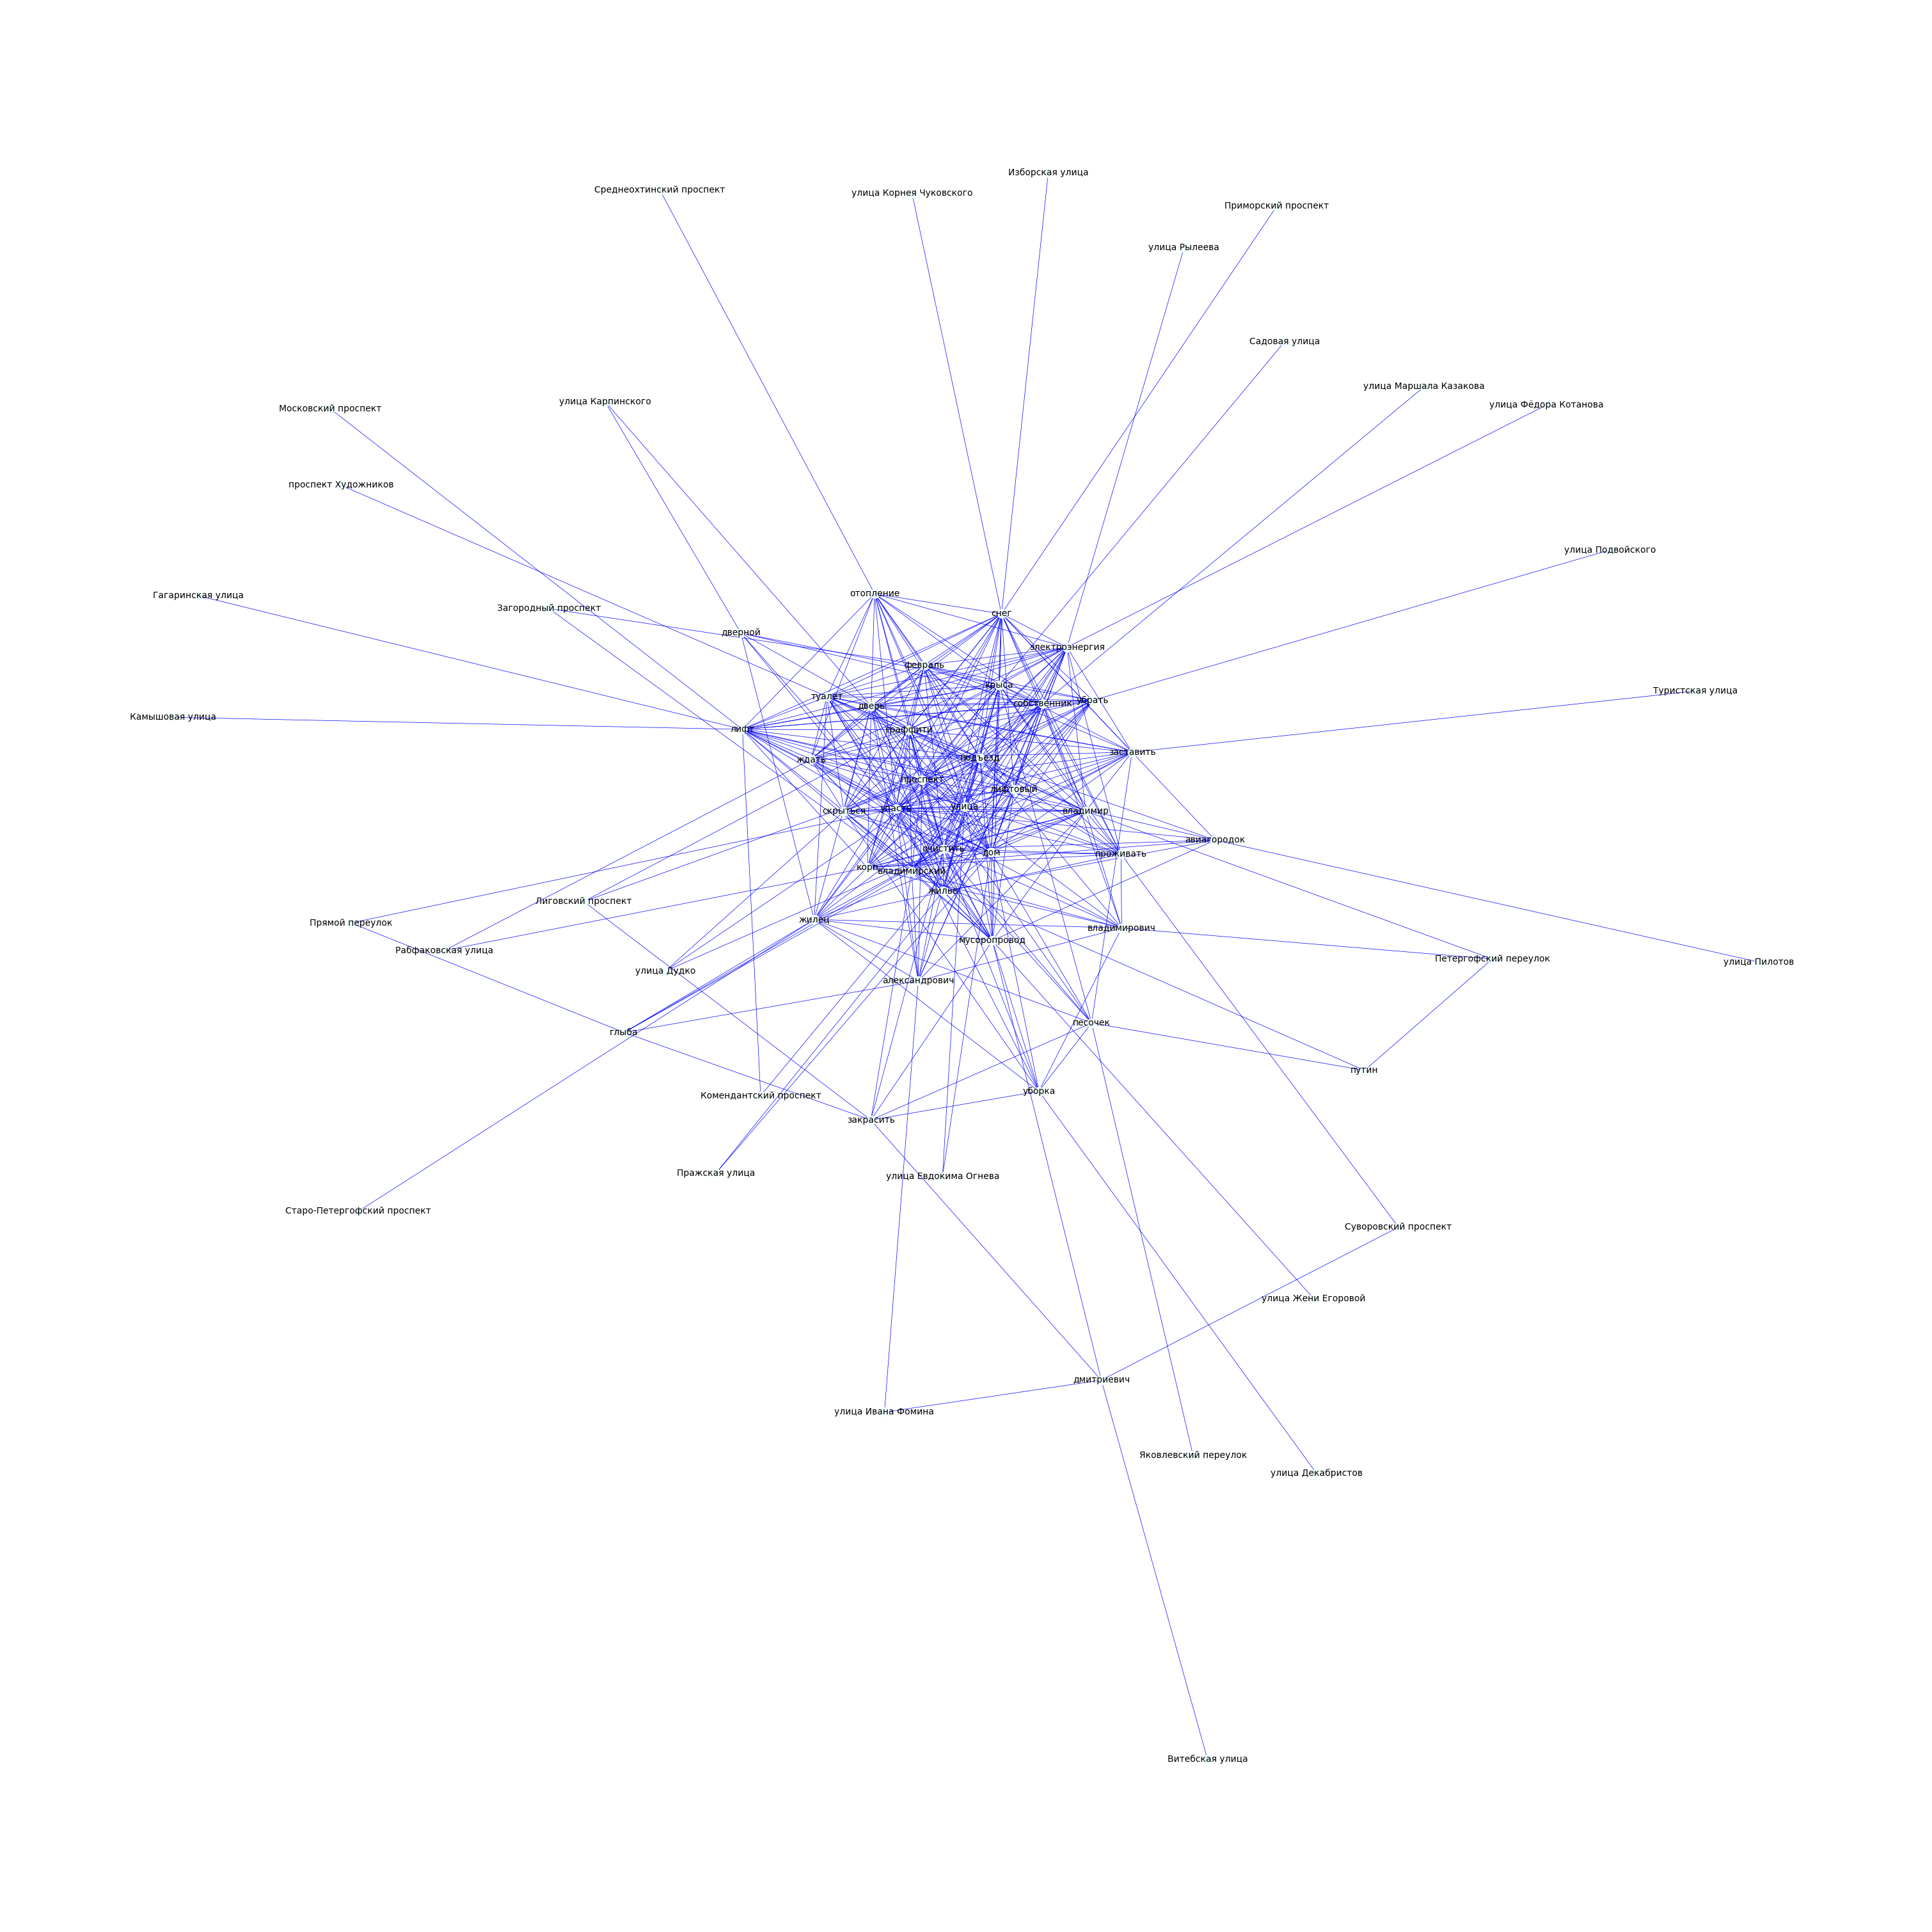

In [33]:
plt.figure(figsize=(30,30))
pos = nx.spring_layout(G)
options = {
    'node_color': 'azure',
    'node_size': 100,
    'width': 0.5,
    'arrowstyle': '-|>',
    'arrowsize': 5,
    'edge_color':'blue',
    'font_size':10
    }
nx.draw(G, with_labels=True, **options)
plt.savefig("I:\\sloyka\\data\\kg1.png", format="PNG")
plt.show()

Сохранение графа

In [ ]:

nx.write_graphml(G, "../data/processed/semantic_graph_example.graphml", encoding = 'utf-8')